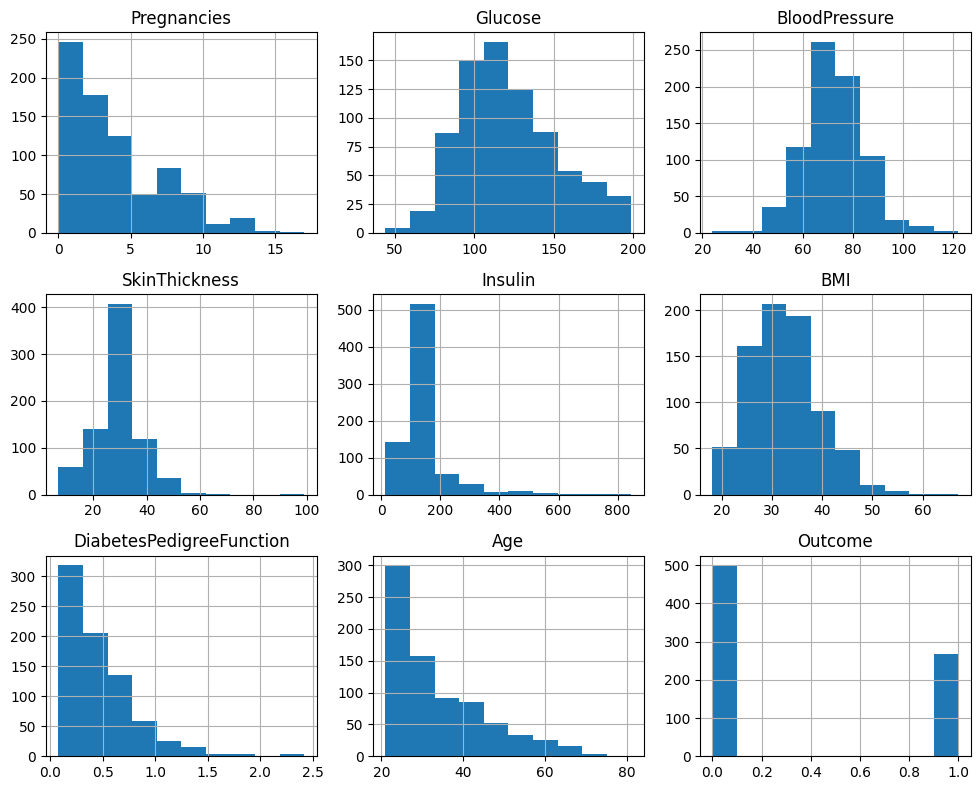

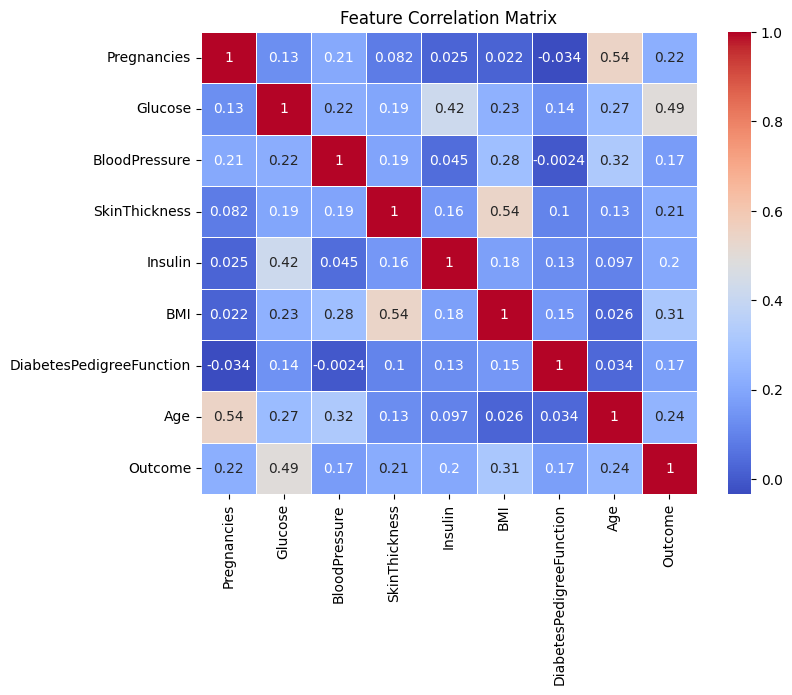

Accuracy: 0.75
Precision: 0.67
Recall: 0.62
F1-Score: 0.64
ROC-AUC Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



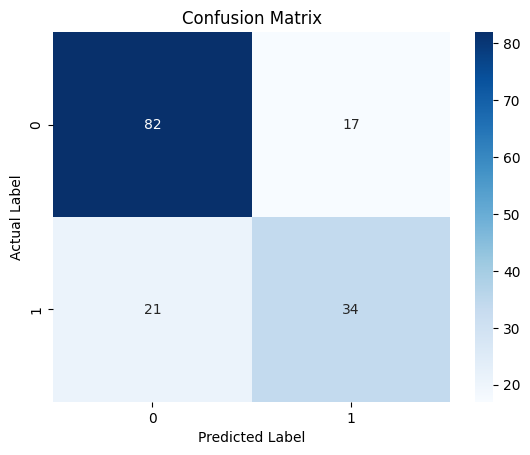

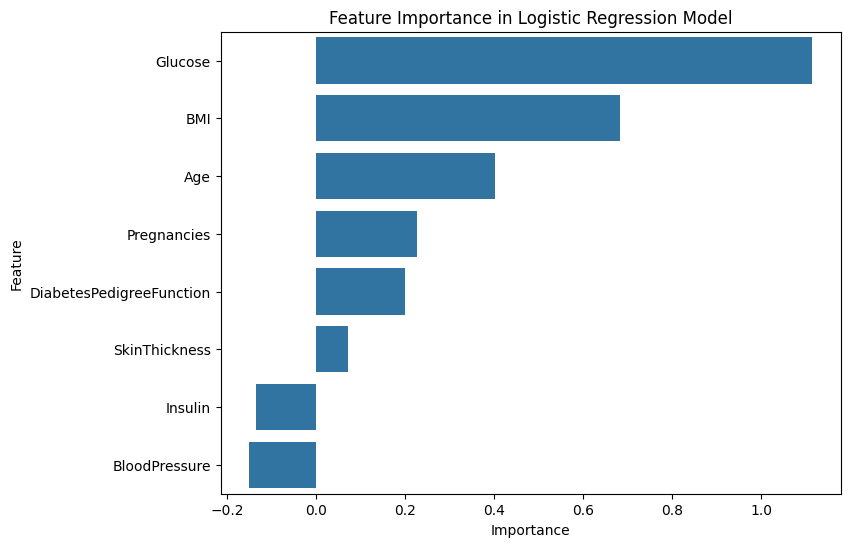

In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset from UCI repository or from a local CSV file
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read the dataset into a DataFrame
df = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
df.head()

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zero values with NaN for columns where zero is not realistic
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Fill NaN values with the median value of each column
df.fillna(df.median(), inplace=True)

# Separate the features and target variable (Outcome)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Normalize the data (scaling features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of training and testing sets
X_train.shape, X_test.shape

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature to understand the distribution
df.hist(figsize=(10, 8), bins=10)
plt.tight_layout()
plt.show()

# Check correlation matrix between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Retrieve feature importances (coefficients)
feature_importances = logistic_model.coef_[0]

# Create a DataFrame to map feature names to coefficients
feature_importance_df = pd.DataFrame({
    'Feature': columns[:-1],
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


In [2]:
import pickle

# Assuming 'logistic_model' is your trained model
# Save the model to a file (e.g., 'logistic_model.pkl')
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

# Save the scaler to a file (if you're scaling the inputs)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
